In [38]:
# Imports
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [2]:
# Loading the dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                            transform=transforms.ToTensor(),  
                                            download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transforms.ToTensor()) 

In [3]:
# NOTE: Setting hyper-parameters
input_size = 784 # 28x28
hidden_size = [32,64,128,256,512,1024] 
num_classes = 10
num_epochs = 5
batch_size = 128
learning_rate = 0.001 

In [4]:
# Defining the dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

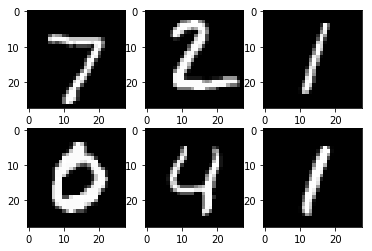

In [5]:
# Visualizing the data
examples = iter(test_loader)
example_data, example_targets = examples.next()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [14]:
# NOTE: Neural Model
class singleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(singleMLP, self).__init__()
        self.input_dim = input_dim
        self.l1 = nn.Linear(input_dim, hidden_dim) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim, num_classes)   
    def forward(self, x):
            out = self.l1(x)
            out = self.relu(out)
            out = self.l2(out)
            return out

In [18]:
# Defining the device
device = torch.device('cpu')

In [19]:
# Creating the model
model = singleMLP(input_size, hidden_size[0], num_classes).to(device)

In [20]:
# Defining the loss and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# Defining the training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step[100/469], Loss: 0.6472
Epoch [1/5], Step[200/469], Loss: 0.4112
Epoch [1/5], Step[300/469], Loss: 0.4112
Epoch [1/5], Step[400/469], Loss: 0.2893
Epoch [2/5], Step[100/469], Loss: 0.3727
Epoch [2/5], Step[200/469], Loss: 0.3558
Epoch [2/5], Step[300/469], Loss: 0.4302
Epoch [2/5], Step[400/469], Loss: 0.3583
Epoch [3/5], Step[100/469], Loss: 0.2957
Epoch [3/5], Step[200/469], Loss: 0.1946
Epoch [3/5], Step[300/469], Loss: 0.2044
Epoch [3/5], Step[400/469], Loss: 0.3744
Epoch [4/5], Step[100/469], Loss: 0.1634
Epoch [4/5], Step[200/469], Loss: 0.3874
Epoch [4/5], Step[300/469], Loss: 0.1977
Epoch [4/5], Step[400/469], Loss: 0.1368
Epoch [5/5], Step[100/469], Loss: 0.1435
Epoch [5/5], Step[200/469], Loss: 0.0910
Epoch [5/5], Step[300/469], Loss: 0.1522
Epoch [5/5], Step[400/469], Loss: 0.2093


In [36]:
# Testing the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    true_lables = []
    predicted_labels = []
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted)
        true_lables.extend(labels)
    accuracy = accuracy_score(true_lables, predicted_labels)*100
    print(f'Accuracy of the network on the 10000 test images: {accuracy} %')
    print(classification_report(true_lables, predicted_labels)) 

Accuracy of the network on the 10000 test images: 95.27 %
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.96      0.92      0.94      1010
           4       0.96      0.95      0.96       982
           5       0.92      0.96      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.91      0.94      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [37]:
# NOTE; Experimenting with different values of hidden layers
accuracies = []
for hidden_size_val in hidden_size:
    print('Experimenting with hidden size value', hidden_size_val)
    # Creating the model
    model = singleMLP(input_size, hidden_size_val, num_classes).to(device)
    # Defining the loss and the optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Defining the training loop
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i+1) % 200 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    # Testing the model
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        true_lables = []
        predicted_labels = []
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            predicted_labels.extend(predicted)
            true_lables.extend(labels)
        accuracy = accuracy_score(true_lables, predicted_labels)*100
        accuracies.append(accuracy)
        print(f'Accuracy of the network on the 10000 test images: {accuracy} %')
        print(classification_report(true_lables, predicted_labels)) 

Experimenting with hidden size value 32
Epoch [1/5], Step[200/469], Loss: 0.3262
Epoch [1/5], Step[400/469], Loss: 0.3217
Epoch [2/5], Step[200/469], Loss: 0.2698
Epoch [2/5], Step[400/469], Loss: 0.2369
Epoch [3/5], Step[200/469], Loss: 0.2302
Epoch [3/5], Step[400/469], Loss: 0.1164
Epoch [4/5], Step[200/469], Loss: 0.2142
Epoch [4/5], Step[400/469], Loss: 0.2618
Epoch [5/5], Step[200/469], Loss: 0.1010
Epoch [5/5], Step[400/469], Loss: 0.1529
Accuracy of the network on the 10000 test images: 95.27 %
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.93      0.95       892
           6       0.95      0.97      0.96       958
           7       0.95      0.95      0.95      1028
     

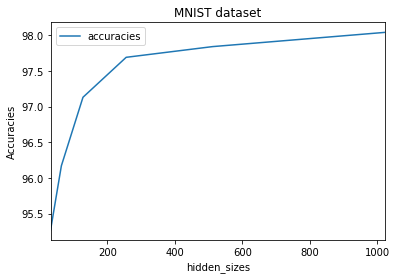

In [45]:
# Plotting the trend of accuracy vs hidden_dim
accuracy_df = pd.DataFrame()
accuracy_df['hidden_sizes'] = hidden_size
accuracy_df['accuracies'] = accuracies
accuracy_df.plot(x="hidden_sizes", y="accuracies", kind="line")
plt.title('MNIST dataset')
plt.ylabel('Accuracies')
plt.show()